## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest. (You can also check out `get_gss.ipynb` for some processed data.)
2. Write a short description of the data you chose, and why. (~500 words)
3. Load the data using Pandas. Clean them up for EDA. Do this in this notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. 
5. Describe your findings. (500 - 1000 words, or more)

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.


In [3]:
!pip install pandas numpy matplotlib seaborn openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
#3
import pandas as pd
import numpy as np

# loading dataset
df = pd.read_excel("./data/GSS.xlsx")

# keeping only variables of interest
df = df[['year', 'wrkstat', 'evwork', 'hrs1', 'hrs2']]

# cleaning categorical variables
df['wrkstat'] = df['wrkstat'].astype('category')
df['evwork'] = df['evwork'].replace({ # replacing non-yes/no with NaN
    '.i:  Inapplicable': None,
    '.n:  No answer': None,
    '.s:  Skipped on Web': None,
    '.d:  Do not Know/Cannot Choose': None
})
df['evwork'] = df['evwork'].astype('category')

# cleaning numeric variables
def clean_hours(x): # helper for stripping labels and converting to numbers
    if pd.isna(x):
        return None
    if isinstance(x, str):
        if x.startswith('.') or not any(c.isdigit() for c in x):
            return None
        try:
            return float(x)
        except:
            return None
    return x

df['hrs1'] = df['hrs1'].apply(clean_hours)
df['hrs2'] = df['hrs2'].apply(clean_hours)

# calculate total_hrs only for workers
df['total_hrs'] = df[['hrs1','hrs2']].sum(axis=1, min_count=1)

# NaN for non-workers
df.loc[~df['wrkstat'].isin(['Working full time','Working part time']), 'total_hrs'] = np.nan

# checks
print(df.head())
print(df.info())

print(df['wrkstat'].value_counts().head())
print(df['evwork'].value_counts())

print(df[['hrs1','hrs2','total_hrs']].describe())

   year            wrkstat evwork  hrs1  hrs2  total_hrs
0  1972  Working full time    NaN   NaN   NaN        NaN
1  1972            Retired    YES   NaN   NaN        NaN
2  1972  Working part time    NaN   NaN   NaN        NaN
3  1972  Working full time    NaN   NaN   NaN        NaN
4  1972      Keeping house    YES   NaN   NaN        NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75699 entries, 0 to 75698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   year       75699 non-null  int64   
 1   wrkstat    75699 non-null  category
 2   evwork     26755 non-null  category
 3   hrs1       43028 non-null  float64 
 4   hrs2       1457 non-null   float64 
 5   total_hrs  43028 non-null  float64 
dtypes: category(2), float64(3), int64(1)
memory usage: 2.5 MB
None
wrkstat
Working full time                         36727
Retired                                   11683
Keeping house                             11061
Wo

/var/folders/gz/y3rbkr6d2fz64b_sp7ykcj0c0000gn/T/ipykernel_12402/3669006590.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="wrkstat", data=df, order=df['wrkstat'].value_counts().index, palette="viridis")


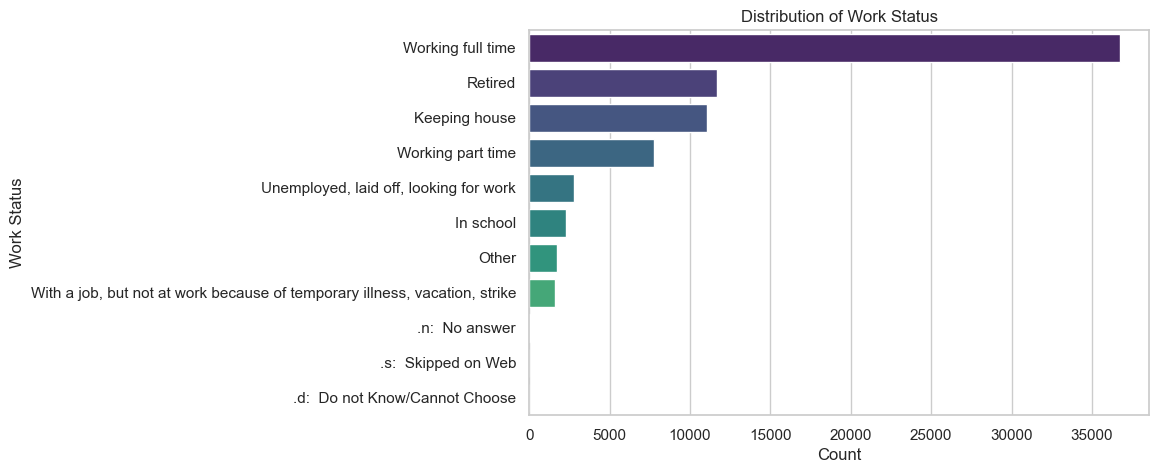

/var/folders/gz/y3rbkr6d2fz64b_sp7ykcj0c0000gn/T/ipykernel_12402/3669006590.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="evwork", data=df, palette="magma")


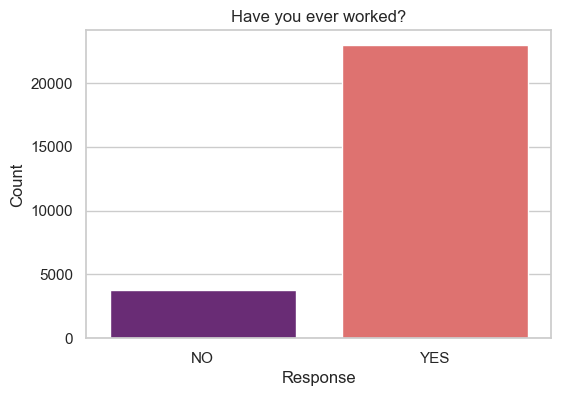

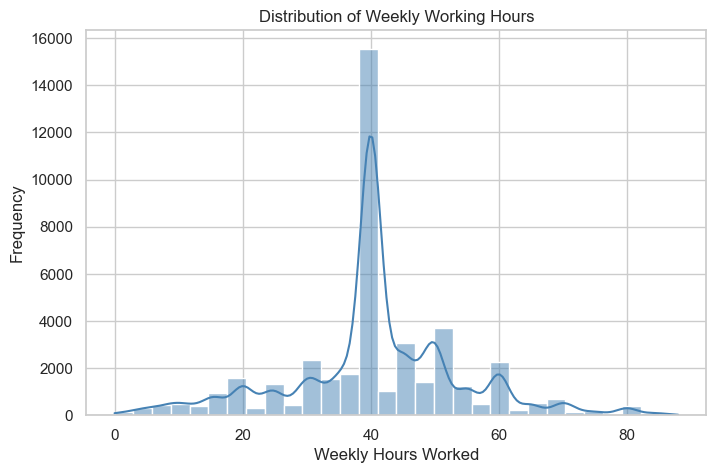

/var/folders/gz/y3rbkr6d2fz64b_sp7ykcj0c0000gn/T/ipykernel_12402/3669006590.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="wrkstat", y="total_hrs", data=df, palette="Set2")


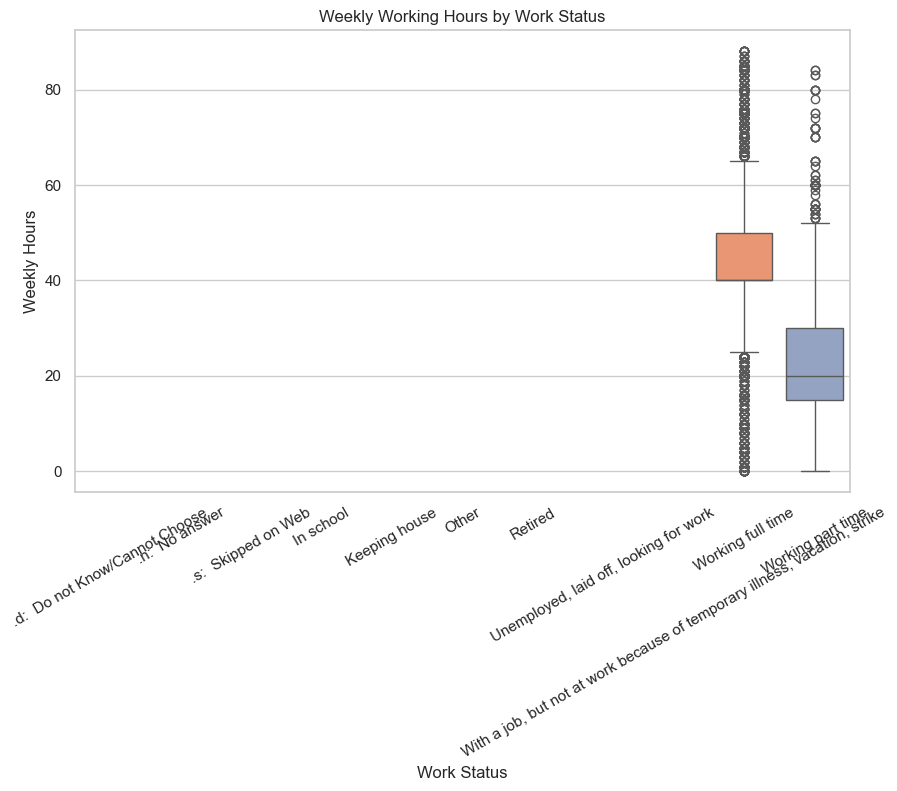

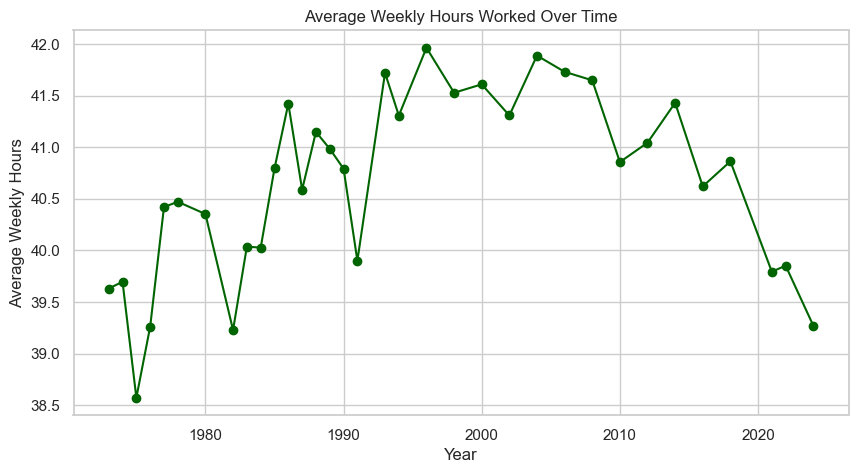


--- Summary Statistics ---
               hrs1         hrs2     total_hrs
count  43028.000000  1457.000000  43028.000000
mean      40.778911    39.017159     40.778911
std       13.588304    13.308640     13.588304
min        0.000000     0.000000      0.000000
25%       37.000000    35.000000     37.000000
50%       40.000000    40.000000     40.000000
75%       48.000000    45.000000     48.000000
max       88.000000    84.000000     88.000000

--- Work Status Counts ---
wrkstat
Working full time                                                             36727
Retired                                                                       11683
Keeping house                                                                 11061
Working part time                                                              7750
Unemployed, laid off, looking for work                                         2796
In school                                                                      2277
Other    

In [ ]:
# 4

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Distribution of Work Status
plt.figure(figsize=(8,5))
sns.countplot(y="wrkstat", data=df, order=df['wrkstat'].value_counts().index, palette="viridis")
plt.title("Distribution of Work Status")
plt.xlabel("Count")
plt.ylabel("Work Status")
plt.show()

# 2. Ever Worked Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="evwork", data=df, palette="magma")
plt.title("Have you ever worked?")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

# 3. Histogram of Weekly Hours
plt.figure(figsize=(8,5))
sns.histplot(df['total_hrs'], bins=30, kde=True, color="steelblue")
plt.title("Distribution of Weekly Working Hours")
plt.xlabel("Weekly Hours Worked")
plt.ylabel("Frequency")
plt.show()

# 4. Boxplot: Hours by Work Status
plt.figure(figsize=(10,6))
sns.boxplot(x="wrkstat", y="total_hrs", data=df, palette="Set2")
plt.title("Weekly Working Hours by Work Status")
plt.xlabel("Work Status")
plt.ylabel("Weekly Hours")
plt.xticks(rotation=30)
plt.show()

# 5. Trend Over Time (Year vs Avg Hours)
avg_hours_by_year = df.groupby("year")['total_hrs'].mean()

plt.figure(figsize=(10,5))
avg_hours_by_year.plot(marker="o", linestyle="-", color="darkgreen")
plt.title("Average Weekly Hours Worked Over Time")
plt.xlabel("Year")
plt.ylabel("Average Weekly Hours")
plt.grid(True)
plt.show()

# 6. Numeric Summaries
print("\n--- Summary Statistics ---")
print(df[['hrs1','hrs2','total_hrs']].describe())

print("\n--- Work Status Counts ---")
print(df['wrkstat'].value_counts())

print("\n--- Ever Worked Counts ---")
print(df['evwork'].value_counts())
